# Join Statements - Lab

## Introduction

In this lab, you'll practice your knowledge on Join statements.

## Objectives

You will be able to:
- Write queries that make use of various types of Joins
- Join tables using foreign keys

## CRM Schema

In almost all cases, rather then just working with a single table we will typically need data from multiple tables. 
Doing this requires the use of **joins ** using shared columns from the two tables. 

In this lab, we'll use the same Customer Relationship Management (CRM) database we used in our lecture before!
<img src='Database-Schema.png' width=550>

## Connecting to the Database
Import the necessary packages and connect to the database **data.sqlite**.

In [2]:
#Your code here
import pandas as pd
import sqlite3
connection = sqlite3.connect('data.sqlite')
cursor = connection.cursor()

## Display the names of all the employees in Boston.

In [3]:
#Your code here
cursor.execute('''SELECT firstName, lastName FROM employees;''').fetchall()

[('Diane', 'Murphy'),
 ('Mary', 'Patterson'),
 ('Jeff', 'Firrelli'),
 ('William', 'Patterson'),
 ('Gerard', 'Bondur'),
 ('Anthony', 'Bow'),
 ('Leslie', 'Jennings'),
 ('Leslie', 'Thompson'),
 ('Julie', 'Firrelli'),
 ('Steve', 'Patterson'),
 ('Foon Yue', 'Tseng'),
 ('George', 'Vanauf'),
 ('Loui', 'Bondur'),
 ('Gerard', 'Hernandez'),
 ('Pamela', 'Castillo'),
 ('Larry', 'Bott'),
 ('Barry', 'Jones'),
 ('Andy', 'Fixter'),
 ('Peter', 'Marsh'),
 ('Tom', 'King'),
 ('Mami', 'Nishi'),
 ('Yoshimi', 'Kato'),
 ('Martin', 'Gerard')]

## Do any offices have no employees?

In [4]:
#Your code here
cursor.execute("""select * from employees
                        left join offices
                        using(officeCode);
                       """)


df = pd.DataFrame(cursor.fetchall()) 
df.columns = [i[0] for i in cursor.description]
df.head()
df[df.officeCode.isnull()]

,employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle,city,phone,addressLine1,addressLine2,state,country,postalCode,territory


## Write 3 Questions of your own and answer them

In [5]:
# Answers will vary

In [6]:
# Your code here
# How many employees did not provide customer service? (left join employees table w/ customers table on
# employeeID = salesrepID)

cursor.execute("""select * from employees e
                        left join customers c
                        on e.employeeNumber = c.salesRepEmployeeNumber;
                       """)


df = pd.DataFrame(cursor.fetchall()) 
df.columns = [i[0] for i in cursor.description]
df.head()
print(len(df[df.salesRepEmployeeNumber.isnull()]))

8


In [7]:
cursor.execute('''SELECT employeeNumber, jobTitle FROM employees;''').fetchall()

[('1002', 'President'),
 ('1056', 'VP Sales'),
 ('1076', 'VP Marketing'),
 ('1088', 'Sales Manager (APAC)'),
 ('1102', 'Sale Manager (EMEA)'),
 ('1143', 'Sales Manager (NA)'),
 ('1165', 'Sales Rep'),
 ('1166', 'Sales Rep'),
 ('1188', 'Sales Rep'),
 ('1216', 'Sales Rep'),
 ('1286', 'Sales Rep'),
 ('1323', 'Sales Rep'),
 ('1337', 'Sales Rep'),
 ('1370', 'Sales Rep'),
 ('1401', 'Sales Rep'),
 ('1501', 'Sales Rep'),
 ('1504', 'Sales Rep'),
 ('1611', 'Sales Rep'),
 ('1612', 'Sales Rep'),
 ('1619', 'Sales Rep'),
 ('1621', 'Sales Rep'),
 ('1625', 'Sales Rep'),
 ('1702', 'Sales Rep')]

In [8]:
# Your code here
# Where are orders being shipped to (by country)?
import collections
cursor.execute("""select * from orders o
                        left join customers c
                        on o.customerNumber = c.customerNumber;
                       """)
df = pd.DataFrame(cursor.fetchall()) 
df.columns = [i[0] for i in cursor.description]
country_list = df.country.tolist()
country_list
count_of_countries = collections.Counter(country_list)
count_of_countries = sorted(((v,k) for (k,v) in count_of_countries.items()), reverse = True)
count_of_countries
df_country = pd.DataFrame(count_of_countries)
df_country.columns = ["num_orders", "country"]
df_country.head()
df_country.set_index('country', inplace =True)
df_country.plot(kind = 'bar')

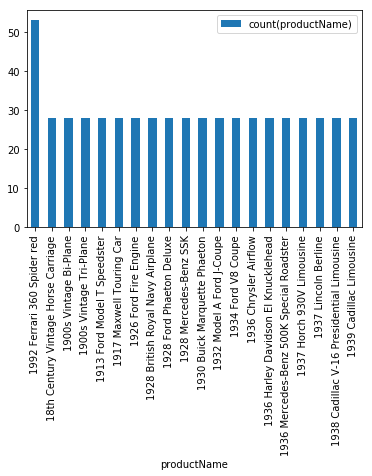

In [9]:
# Your code here
# Most popular products being sold

cursor.execute("""select productName, count(productName), productLine, productDescription, quantityInStock from orderdetails o
                        left join products p
                        on o.productCode = p.productCode GROUP BY productName ORDER BY count(productName) DESC;
                       """)
df = pd.DataFrame(cursor.fetchall()) 
df.columns = [i[0] for i in cursor.description]
df.head()
df_graph = df[['productName', 'count(productName)', 'quantityInStock']]
df_graph = df_graph.set_index('productName')
df_graph.head(20).plot(kind='bar')


## Level Up: Display the names of each product each employee has sold.

In [10]:
# Your code here
cursor.execute('''SELECT firstName, lastName, productName FROM employees
                        INNER JOIN customers
                            on employees.employeeNumber = customers.salesRepEmployeeNumber
                        LEFT JOIN orders
                            on customers.customerNumber = orders.customerNumber
                        LEFT JOIN orderdetails
                            on orders.orderNumber = orderdetails.orderNumber
                        LEFT JOIN products
                            on orderdetails.productCode = products.productCode''').fetchall()

[('Leslie', 'Jennings', '1958 Setra Bus'),
 ('Leslie', 'Jennings', '1940 Ford Pickup Truck'),
 ('Leslie', 'Jennings', '1939 Cadillac Limousine'),
 ('Leslie', 'Jennings', '1996 Peterbilt 379 Stake Bed with Outrigger'),
 ('Leslie', 'Jennings', '1968 Ford Mustang'),
 ('Leslie', 'Jennings', '1968 Dodge Charger'),
 ('Leslie', 'Jennings', '1970 Plymouth Hemi Cuda'),
 ('Leslie', 'Jennings', '1969 Dodge Charger'),
 ('Leslie', 'Jennings', '1948 Porsche 356-A Roadster'),
 ('Leslie', 'Jennings', '1969 Dodge Super Bee'),
 ('Leslie', 'Jennings', '1976 Ford Gran Torino'),
 ('Leslie', 'Jennings', '1957 Vespa GS150'),
 ('Leslie', 'Jennings', '1957 Corvette Convertible'),
 ('Leslie', 'Jennings', '1982 Ducati 900 Monster'),
 ('Leslie', 'Jennings', '1982 Lamborghini Diablo'),
 ('Leslie', 'Jennings', '1971 Alpine Renault 1600s'),
 ('Leslie', 'Jennings', '1956 Porsche 356A Coupe'),
 ('Leslie', 'Jennings', '1961 Chevrolet Impala'),
 ('Leslie', 'Jennings', '1982 Ducati 996 R'),
 ('Leslie', 'Jennings', '1974 

## Level Up: Display the Number of Products each Employee Has sold

In [ ]:
#Your code here

## Summary

Congrats! You now know how to use Join statements, along with leveraging your foreign keys knowledge!